In [2]:
from gas_hale import GasPoweredHALE
import gpkit
import numpy as np
gpkit.settings['latex_modelname'] = False

# to modify the GasPoweredHALE model, edit gas_hale.py

m = GasPoweredHALE()
m.substitutions.update({'A':18})
sol = m.solve()
#m.controlpanel()

Using solver 'cvxopt'
Solving for 20 variables.
Solving took 0.0333 seconds.

Cost
----
 146.3 [lbf] 

Free Variables
--------------
         C_D : 0.05883                Drag coefficient              
         C_L : 1.105                  Lift coefficient              
         C_f : 0.005509               wing skin friction coefficient
  C_{Torque} : 0.1592                 Torque coefficient            
   P_{shaft} : 1277       [W]         Shaft power                   
          Re : 4.373e+05              Reynolds number               
           S : 1.823      [m**2]      Wing reference area           
     T_{atm} : 254.1      [K]         air temperature               
           V : 31.34      [m/s]       Cruise velocity               
    V_{wind} : 31.34      [m/s]       wind speed                    
           W : 146.3      [lbf]       Aircraft weight               
W_{airframe} : 36.58      [lbf]       Airframe weight               
     W_{eng} : 25.42      [N]         E

In [3]:
x = sol('W_{fuel}')/sol('W')
y = sol('W_{pay}')/sol('W')
z = sol('P_{shaft}')/745.699872
print x
print y
print z

0.628937124695
0.0683397848994
1.7126887115


In [4]:
import numpy as np
m.substitutions.update({"t": ('sweep', np.linspace(4, 8, 15)),
                        "W_{pay}": ('sweep', np.linspace(4,15,15))})
sol = m.solve(solver="mosek", verbosity=0, skipsweepfailures=True)

/Users/mjburton11/anaconda/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)
/Users/mjburton11/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/mjburton11/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


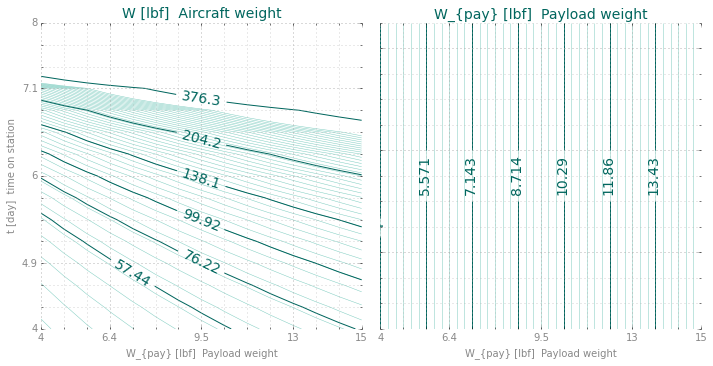

In [6]:
%matplotlib inline
from gpkit.interactive.plotting import contour_array
fig, subplots = contour_array(m, "W_{pay}", "t", ["W", "W_{pay}"])


In [9]:
#for sp in subplots:
sp = subplots[0]
sp.set_xlabel("Payload Weight", color="black", fontsize=12)
sp.set_ylabel("Time on Station", color="black", fontsize=12)
sp.set_title("Total Weight", color="black", fontsize=12)
sp.tick_params(labelsize=12, labelcolor="black", color="black")
#fig
fig.savefig("TvsV.pdf")